# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

634


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# # set up lists to hold reponse info
search_data = []
cityList = []
countryList = []

searchCnt = 0
print("Begin API Call to OpenWeather Database ")
print("---------------------------------------")
for city in cities:
    searchCnt += 1
    print(f"Processing record {searchCnt} for the city: {city}")   
    response = requests.get(query_url + city).json()
    searchCityID = response.get("id")
    if response.get("id"):
        print(f"     Record found for city: {city}    city id: {searchCityID}")
        search_data.append(response)
        cityList.append(city)
    else:
        print(f"     No weather record found for city: {city}")


Begin API Call to OpenWeather Database 
---------------------------------------
Processing record 1 for the city: dikson
     Record found for city: dikson    city id: 1507390
Processing record 2 for the city: hope
     Record found for city: hope    city id: 5976783
Processing record 3 for the city: vila velha
     Record found for city: vila velha    city id: 6320062
Processing record 4 for the city: illoqqortoormiut
     No weather record found for city: illoqqortoormiut
Processing record 5 for the city: vaini
     Record found for city: vaini    city id: 1273574
Processing record 6 for the city: nianzishan
     Record found for city: nianzishan    city id: 2035593
Processing record 7 for the city: evensk
     Record found for city: evensk    city id: 2125693
Processing record 8 for the city: mandera
     Record found for city: mandera    city id: 187896
Processing record 9 for the city: avarua
     Record found for city: avarua    city id: 4035715
Processing record 10 for the city:

     No weather record found for city: attawapiskat
Processing record 83 for the city: inverell
     Record found for city: inverell    city id: 2162662
Processing record 84 for the city: sindou
     Record found for city: sindou    city id: 2355548
Processing record 85 for the city: point pedro
     Record found for city: point pedro    city id: 1229989
Processing record 86 for the city: mataura
     Record found for city: mataura    city id: 6201424
Processing record 87 for the city: lake havasu city
     Record found for city: lake havasu city    city id: 5301388
Processing record 88 for the city: new norfolk
     Record found for city: new norfolk    city id: 2155415
Processing record 89 for the city: sinjah
     No weather record found for city: sinjah
Processing record 90 for the city: luderitz
     Record found for city: luderitz    city id: 3355672
Processing record 91 for the city: moroni
     Record found for city: moroni    city id: 5543462
Processing record 92 for the city:

     Record found for city: iranshahr    city id: 1160939
Processing record 164 for the city: aleysk
     Record found for city: aleysk    city id: 1511783
Processing record 165 for the city: bulawayo
     Record found for city: bulawayo    city id: 894701
Processing record 166 for the city: guane
     Record found for city: guane    city id: 3557758
Processing record 167 for the city: khatanga
     Record found for city: khatanga    city id: 2022572
Processing record 168 for the city: goderich
     Record found for city: goderich    city id: 5962442
Processing record 169 for the city: esperance
     Record found for city: esperance    city id: 3573739
Processing record 170 for the city: paamiut
     Record found for city: paamiut    city id: 3421193
Processing record 171 for the city: ancud
     Record found for city: ancud    city id: 3899695
Processing record 172 for the city: aklavik
     Record found for city: aklavik    city id: 5882953
Processing record 173 for the city: kruisfo

     Record found for city: hamilton    city id: 5969785
Processing record 246 for the city: marrakesh
     Record found for city: marrakesh    city id: 2542997
Processing record 247 for the city: dargaville
     Record found for city: dargaville    city id: 2191911
Processing record 248 for the city: asosa
     Record found for city: asosa    city id: 343292
Processing record 249 for the city: ushtobe
     Record found for city: ushtobe    city id: 1517637
Processing record 250 for the city: bathsheba
     Record found for city: bathsheba    city id: 3374083
Processing record 251 for the city: jabiru
     No weather record found for city: jabiru
Processing record 252 for the city: taoudenni
     Record found for city: taoudenni    city id: 2450173
Processing record 253 for the city: ixtapa
     Record found for city: ixtapa    city id: 4004293
Processing record 254 for the city: wewak
     Record found for city: wewak    city id: 2083537
Processing record 255 for the city: micheweni
 

     Record found for city: aykhal    city id: 2027296
Processing record 328 for the city: coahuayana
     Record found for city: coahuayana    city id: 3981460
Processing record 329 for the city: yongan
     Record found for city: yongan    city id: 1806687
Processing record 330 for the city: lyubinskiy
     Record found for city: lyubinskiy    city id: 1500125
Processing record 331 for the city: carbondale
     Record found for city: carbondale    city id: 4269076
Processing record 332 for the city: san martin
     Record found for city: san martin    city id: 5392408
Processing record 333 for the city: waipawa
     Record found for city: waipawa    city id: 2185329
Processing record 334 for the city: salalah
     Record found for city: salalah    city id: 286621
Processing record 335 for the city: guarapari
     Record found for city: guarapari    city id: 3461888
Processing record 336 for the city: kozhva
     Record found for city: kozhva    city id: 543246
Processing record 337 f

     Record found for city: zermatt    city id: 2657928
Processing record 411 for the city: soyo
     Record found for city: soyo    city id: 2236967
Processing record 412 for the city: coihaique
     Record found for city: coihaique    city id: 3894426
Processing record 413 for the city: taunggyi
     Record found for city: taunggyi    city id: 1293960
Processing record 414 for the city: cabedelo
     Record found for city: cabedelo    city id: 3404558
Processing record 415 for the city: yakshur-bodya
     No weather record found for city: yakshur-bodya
Processing record 416 for the city: oranjemund
     Record found for city: oranjemund    city id: 3354071
Processing record 417 for the city: yerbogachen
     Record found for city: yerbogachen    city id: 2012956
Processing record 418 for the city: norilsk
     Record found for city: norilsk    city id: 1497337
Processing record 419 for the city: macusani
     Record found for city: macusani    city id: 3935624
Processing record 420 f

     Record found for city: dungarvan    city id: 2964528
Processing record 492 for the city: luanda
     Record found for city: luanda    city id: 2240449
Processing record 493 for the city: lavrentiya
     Record found for city: lavrentiya    city id: 4031637
Processing record 494 for the city: tambul
     No weather record found for city: tambul
Processing record 495 for the city: san marcos
     Record found for city: san marcos    city id: 3589805
Processing record 496 for the city: muisne
     Record found for city: muisne    city id: 3653967
Processing record 497 for the city: san pedro de macoris
     Record found for city: san pedro de macoris    city id: 3493032
Processing record 498 for the city: okha
     Record found for city: okha    city id: 2122614
Processing record 499 for the city: vilhena
     Record found for city: vilhena    city id: 3924679
Processing record 500 for the city: grindavik
     Record found for city: grindavik    city id: 3416888
Processing record 501

     Record found for city: marsh harbour    city id: 3571913
Processing record 573 for the city: mapiripan
     Record found for city: mapiripan    city id: 3792394
Processing record 574 for the city: bolungarvik
     No weather record found for city: bolungarvik
Processing record 575 for the city: lompoc
     Record found for city: lompoc    city id: 5367788
Processing record 576 for the city: riyadh
     Record found for city: riyadh    city id: 108410
Processing record 577 for the city: estelle
     Record found for city: estelle    city id: 4671240
Processing record 578 for the city: henties bay
     Record found for city: henties bay    city id: 3356832
Processing record 579 for the city: sisimiut
     Record found for city: sisimiut    city id: 3419842
Processing record 580 for the city: hami
     Record found for city: hami    city id: 1529484
Processing record 581 for the city: bilma
     Record found for city: bilma    city id: 2446796
Processing record 582 for the city: ajda

In [12]:
lat_data = [data.get("coord").get("lat") for data in search_data]
lng_data = [data.get("coord").get("lon") for data in search_data]
temp_data = [data.get("main").get("temp") for data in search_data]
humid_data = [data.get("main").get("humidity") for data in search_data]
cloud_data =[data.get("clouds").get("all") for data in search_data]
wind_data = [data.get("wind").get("speed") for data in search_data]

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
weather_data = pd.DataFrame({"cityName":cityList,
                            "lat":lat_data,
                            "lng":lng_data,
                            "temp":temp_data,
                            "humidity":humid_data,
                            "cloudiness":cloud_data,
                            "winds":wind_data})
weather_data.head()

,cityName,lat,lng,temp,humidity,cloudiness,winds
0,dikson,73.51,80.55,-13.88,79,0,6.16
1,hope,49.38,-121.43,-0.07,56,1,4.10
2,vila velha,-3.71,-38.60,28.00,74,0,5.10
3,vaini,15.34,74.49,24.57,69,0,1.76
4,nianzishan,47.51,122.88,-4.21,72,12,2.36


In [18]:
#MakeCSV
weather_data.to_csv("weatherdata.csv", encoding="utf-8", index=False)

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

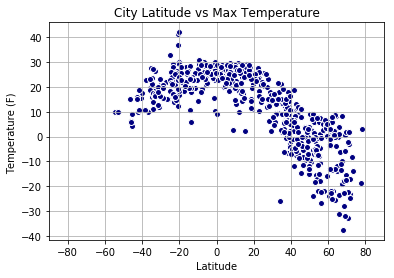

In [24]:
# Latitude vs Max Temp
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o", color="navy", edgecolor="white")

# Add chart labels
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (F) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_MaxTemp.png")
# Show plot
plt.show()

#### Latitude vs. Humidity Plot

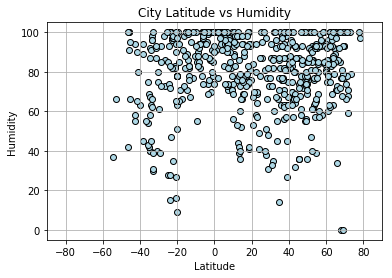

In [25]:
# Latitude vs Max Temp
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o", color='lightblue', edgecolor='black')

# Add chart labels
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Humidity.png")
# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

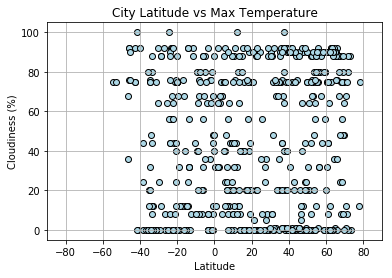

In [26]:
# Latitude vs Max Temp
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o", color='lightblue', edgecolor='black')

# Add chart labels
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Cloudiness.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

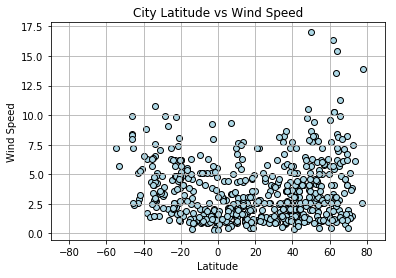

In [27]:
# Latitude vs Max Temp
plt.scatter(weather_data["lat"], weather_data["winds"], marker="o", color='lightblue', edgecolor='black')

# Add chart labels
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Wind Speed.png")
# Show plot
plt.show()